#Introduction to PyTorch


---


First, we import pytorch.

In [ ]:
import torch

Let us see a few basic tensor manipulations.




In [ ]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


Above, we create a 5x3 matrix filled with zeros, and query its datatype
to find out that the zeros are 32-bit floating point numbers, which is
the default PyTorch.

What if you wanted integers instead? You can always override the
default:




In [ ]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)



# You can see that when we do change the default, the tensor helpfully reports this when printed.

# It is common to initialize learning weights randomly, often with a specific seed for the Random Number Generator(PRNG) for reproducibility of results:




In [ ]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


# PyTorch tensors perform arithmetic operations intuitively. Tensors of similar shapes may be added, multiplied, etc. Operations with scalars are distributed over the tensor. The syntaxis is very similar to **numpy.**




In [ ]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


Here’s a small sample of the mathematical operations available:




In [ ]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
U, S, V = torch.svd(r)
print(U, S, V)

# and let us check that this is indeed SVD: r = U diag(S) V.T
reconstructed = torch.matmul(torch.matmul(U, torch.diag(S)), V.T)
print(f'and now we should get the original matrix')
print(reconstructed)

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Absolute value of r:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sine of r:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

Determinant of r:
tensor(-0.5703)

Singular value decomposition of r:
tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]) tensor([1.1793, 0.4836]) tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]])
and now we should get the original matrix
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Average and standard deviation of r:
(tensor(0.7217), tensor(0.1247))

Maximum value of r:
tensor(0.9956)


# We will now use torch tensors to perform deep learning in Pytorch and deal with Neural Networks (nn)

In [ ]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

In [ ]:
import numpy as np

class FlexibleMLP(nn.Module):
    def __init__(self, layers: list, scale: float=1.):
        """
        param: layers = list of integers
        """
        super(FlexibleMLP, self).__init__()

        self.layers = nn.ModuleList()
        self.activations = nn.ModuleList()

        for i in range(len(layers) - 1):
            layer = nn.Linear(layers[i], layers[i+1])

            # LeCun initialization
            nn.init.normal_(layer.weight, mean=0.0, std=scale * np.sqrt(1 / layers[i]))
            nn.init.normal_(layer.bias, mean=0.0, std=scale * np.sqrt(1 / layers[i]))

            self.layers.append(layer)
            # Add ReLU activation after each layer except the last
            if i < len(layers) - 2:
                self.activations.append(nn.ReLU())
            else:
                # Placeholder for the last layer's activation
                self.activations.append(nn.Identity())

    def forward(self, x, return_last_hidden=False):
        last_hidden = None

        for layer, activation in zip(self.layers[:-1], self.activations[:-1]):
            x = activation(layer(x))
            last_hidden = x  # Update last_hidden at each hidden layer

        # Apply the last layer without ReLU (or Identity for the placeholder)
        x = self.layers[-1](x)

        if return_last_hidden:
            return x, last_hidden
        return x



# Example usage:
# Create an MLP with input size of 10, two hidden layers with 64 and 32 neurons,
# and an output size of 5.
layer_sizes = [10, 64, 32, 1]
model = FlexibleMLP(layer_sizes)

# Example input
x = torch.rand(1, 10)  # Batch size of 1, input size of 10
output = model(x)
print(output)

output, last_hidden = model(x, return_last_hidden=True)
print(output, last_hidden)


tensor([[-0.4746]], grad_fn=<AddmmBackward0>)
tensor([[-0.4746]], grad_fn=<AddmmBackward0>) tensor([[0.0000, 0.7794, 0.0000, 0.0000, 0.0000, 0.3478, 0.2206, 0.0000, 0.2041,
         0.0000, 0.0617, 0.2980, 0.2313, 0.0000, 0.0000, 0.5491, 0.0000, 0.3899,
         0.0287, 0.0000, 0.4704, 0.6322, 0.0000, 0.8679, 0.0000, 0.0000, 0.0000,
         0.1513, 0.3314, 0.0391, 0.0000, 0.8977]], grad_fn=<ReluBackward0>)


This demonstrates the structure of a typical PyTorch model:

-  It inherits from ``torch.nn.Module`` - modules may be nested

-  A model will have an ``__init__()`` function, where it instantiates
   its layers, and loads any data artifacts it might
   need (e.g., an NLP model might load a vocabulary).
-  A model will have a ``forward()`` function. This is where the actual
   computation happens: An input is passed through the network layers
   and various functions to generate an output.
-  Other than that, you can build out your model class like any other
   Python class, adding whatever properties and methods you need to
   support your model’s computation.

The call to super(GenericMLP, self).__init__() in a PyTorch model's constructor is crucial for several reasons related to the object-oriented programming concepts in Python, particularly when dealing with class inheritance. Here's why it's important:

Inheritance Initialization: PyTorch models typically inherit from nn.Module, which is the base class for all neural network modules in PyTorch. The nn.Module class has its own __init__ method, which performs important setup tasks, such as initializing internal variables and the model's parameters. By calling super(GenericMLP, self).__init__(), you ensure that this initialization logic in nn.Module is executed, setting up the model correctly.

Multiple Inheritance Support: The use of super() follows Python's method resolution order (MRO), which supports complex inheritance schemes, including multiple inheritance. This is more of a general Python feature than specific to PyTorch, but it's important for maintaining compatibility and expected behaviors in classes that might inherit from multiple base classes now or in the future.

Maintainability and Future-proofing: By calling the base class initializer properly, you ensure that your class will correctly inherit any changes or enhancements made to the base class in future versions of the library. This is important for maintaining and updating your code as PyTorch evolves.

Enabling Advanced PyTorch Features: The nn.Module base class does a lot more than just parameter registration. It also sets up hooks, buffers, and other advanced features that you might want to use in your model. If the base class constructor is not called, these features won't be initialized properly, and your model might not function as expected or take advantage of these advanced capabilities.

In summary, calling super(GenericMLP, self).__init__() in the constructor of a PyTorch model is essential for ensuring that the model inherits and initializes properly according to the nn.Module class's requirements, enabling you to leverage the full capabilities of PyTorch's modular design for neural networks.

Let’s instantiate this object and run a sample input through it.

In [ ]:
import torch
import numpy as np
import random

def set_seed(seed_value=42):
    """Set seed for reproducibility."""
    np.random.seed(seed_value)  # Set NumPy seed
    torch.manual_seed(seed_value)  # Set PyTorch seed
    random.seed(seed_value)  # Set Python random seed

    # If you are using CUDA:
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)  # For multi-GPU
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(42)  # Fixing the seed


# 42 is because of [Hitchhiker's guide](https://https://simple.wikipedia.org/wiki/42_(answer)#:~:text=42%20is%20the%20%22Answer%20to,the%20second%20greatest%20computer%20ever.)

# We will not setup a relatively simple non-linear relationship,
$$
y\ =\ \cos(X\beta)\ +\ \epsilon
$$
#and try to see if a Neural net is capable of learning it

In [ ]:
# Parameters
set_seed(42)  # Fixing the seed
n_samples = 1000
n_features = 10
beta_true = np.random.randn(n_features, 1)  # True coefficients

# Simulate data
noise_scale = 0

X = np.random.randn(n_samples, n_features)
epsilon = np.random.randn(n_samples, 1) * noise_scale  # Noise
y = np.cos(X @ beta_true) + epsilon

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


# We now need to introduce classes for dealing with data. This is the good way of using Pytorch

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
# Split data
set_seed(42)  # Fixing the seed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets and DataLoaders for training and test sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


<ipython-input-73-4e0637598dc7>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-73-4e0637598dc7>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
<ipython-input-73-4e0637598dc7>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-73-4e0637598dc7>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.c

#A ``Dataset`` subclass wraps access to the data, and is specialized to the type of data it’s serving. The ``DataLoader`` knows *nothing* about the data, but organizes the input tensors served by the ``Dataset`` into batches with the parameters you specify.

# In the example above, we’ve asked a ``DataLoader`` to give us batches of 32 observatiobs from ``trainset``, randomizing their order (``shuffle=True``), and we told it to spin up two workers to load data.




# Now, we introduce the criterion and the optimizer. The latter defines how exactly we perform gradient descent.

In [ ]:
width = 64
set_seed(42)  # Fixing the seed
model = FlexibleMLP([n_features, width, width, 1])  # Adjust output size and activation as needed
criterion = nn.MSELoss()  # For prediction, MSE is the standard objective; but other, custom objective might be better;
# choose loss appropriate for your task
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # this is one of the most popular gradient descent algorithms


# and now we can finally train our model: We loop gradient descent 20 times through the whole dataset

In [ ]:
set_seed(42)  # Fixing the seed
import torch.optim as optim
# Proceed with the rest of the setup (loss, optimizer) and training loop as before
# Training loop
num_epochs = 200  # You might need more epochs for a deep network
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad() # forget the gradients from old steps of Gradient Descent (GD)
        loss.backward() # compute the new gradient
        optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [20/200], Loss: 0.1795
Epoch [40/200], Loss: 0.1373
Epoch [60/200], Loss: 0.0282
Epoch [80/200], Loss: 0.0108
Epoch [100/200], Loss: 0.0031
Epoch [120/200], Loss: 0.0024
Epoch [140/200], Loss: 0.0013
Epoch [160/200], Loss: 0.0009
Epoch [180/200], Loss: 0.0028
Epoch [200/200], Loss: 0.0008


Here, we are doing **200 training epochs** (line 1) - that is, twenty
passes over the training dataset. Each pass has an inner loop that
**iterates over the training data** (line 4), serving batches of
transformed input images and their correct labels.

**Zeroing the gradients** is an important step. Gradients are
accumulated over a batch; if we do not reset them for every batch, they
will keep accumulating, which will provide incorrect gradient values,
making learning impossible.

We **ask the model for its predictions** on this batch. In
the following line, we compute the loss - the distance between
``outputs`` (the model prediction) and ``targets`` (the correct output).

We then do the ``backward()`` pass, and calculate the gradients
that will direct the learning.
The optimizer performs one learning step - it uses the
gradients from the ``backward()`` call to nudge the learning weights in the direction it thinks will reduce the loss.

The remainder of the loop does some light reporting on the epoch number,
how many training instances have been completed, and what the collected
loss is over the training loop.

Note that the loss is monotonically descending, indicating that our
model is continuing to improve its performance on the training dataset.

As a final step, we should check that the model is actually doing
*general* learning, and not simply “memorizing” the dataset. This is
called **overfitting,** and usually indicates that the dataset is too
small (not enough examples for general learning), or that the model has
more learning parameters than it needs to correctly model the dataset.

This is the reason datasets are split into training and test subsets -
to test the generality of the model, we ask it to make predictions on
data it hasn’t trained on.




# Let us now illustrate train and test sample performance

#**Let us now illustrate train and test sample performance.**
#you should call **model.eval()** before extracting outputs from a trained neural network, especially if your network includes layers that behave differently during training and inference, such as dropout layers or batch normalization layers.

#Calling model.eval() sets the model to evaluation mode, which is necessary for two main reasons:

#Consistent Behavior: Some layers, like dropout and batch normalization, have different behaviors during training vs. inference. For example, dropout randomly zeroes some of the outputs of the neurons during training to prevent overfitting but does nothing during inference. Similarly, batch normalization uses running statistics for normalization during inference instead of batch statistics. Calling model.eval() ensures these layers behave correctly during inference.

#Improved Performance: Since layers like dropout are not active during evaluation, the model might run slightly faster.

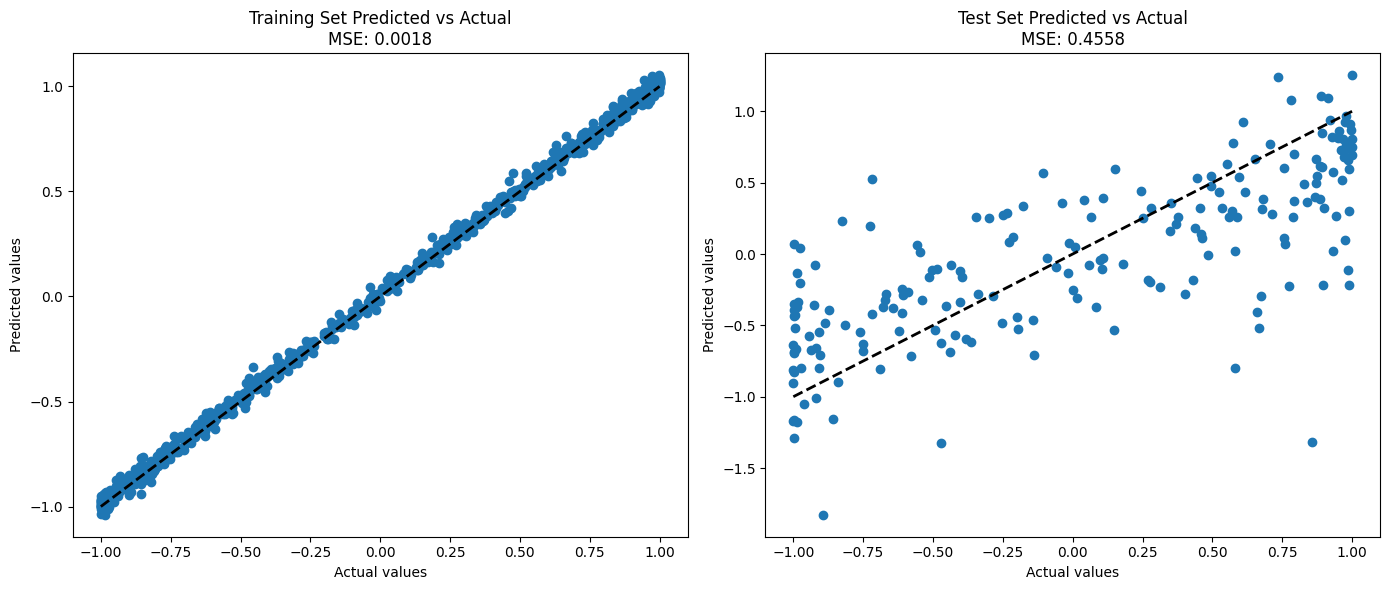

In [ ]:
import matplotlib.pyplot as plt

# Ensure the model is in evaluation mode
model.eval()

# Function to get predictions
def get_predictions(loader):
    targets = []
    predictions = []

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            targets.extend(labels.numpy())
            predictions.extend(outputs.numpy())

    return np.array(targets).flatten(), np.array(predictions).flatten()

# Get predictions for both training and test sets
train_targets, train_predictions = get_predictions(train_loader)
test_targets, test_predictions = get_predictions(test_loader)

# Calculate MSE for both training and test sets
train_mse = np.mean((train_targets - train_predictions) ** 2) / np.mean((train_targets) ** 2)
test_mse = np.mean((test_targets - test_predictions) ** 2) / np.mean((test_targets) ** 2)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Training set subplot
axs[0].scatter(train_targets, train_predictions)
axs[0].plot([train_targets.min(), train_targets.max()], [train_targets.min(), train_targets.max()], 'k--', lw=2)  # Diagonal line
axs[0].set_xlabel('Actual values')
axs[0].set_ylabel('Predicted values')
axs[0].set_title(f'Training Set Predicted vs Actual\nMSE: {train_mse:.4f}')

# Test set subplot
axs[1].scatter(test_targets, test_predictions)
axs[1].plot([test_targets.min(), test_targets.max()], [test_targets.min(), test_targets.max()], 'k--', lw=2)  # Diagonal line
axs[1].set_xlabel('Actual values')
axs[1].set_ylabel('Predicted values')
axs[1].set_title(f'Test Set Predicted vs Actual\nMSE: {test_mse:.4f}')

plt.tight_layout()
plt.show()


# We observe massive overfit and a huge gap between train and test performance

# Let us now try to understand what is going on.
# Remeber what the NN does: It samples the weights and biases $W_1$ (first hidden layer weights), $W_2$ (second hidden layer weights) and $W_3$ (output layer weights) as well as biases $b_1,b_2,b_3$ from $N(0, (scale/\sqrt{width})^2).$
$$
f(x) = W_3\sigma(W_2 \sigma(W_1x+b_1)+b_2)\ +\ b_3
$$
#Here,
$$
x\in \mathbb R^d,\ W_1\in \mathbb R^{n\times d}, b_1\in \mathbb R^n, W_2\in \mathbb R^{n\times n}, b_2\in \mathbb R^n, W_3\in \mathbb R^{1\times n}
$$
#Thus, we can define last-hidden-layer features
$$
h_i(x)\ =\ \sigma(W_{2,i} \sigma(W_1x+b_1)+b_{2,i}), i =1,...,n
$$
#(for us, $n=64$) and
$$
f(x)\ =\ \sum_{i=1}^n W_{3,i}h_i(x)\ +\ b_3
$$
#Well, then we can just use the **learned features** $h_i(x)$ to run the model as a simple linear model. Perhaps we could do even better?

In [ ]:
model.eval()
train_data_predictions, train_data_features = model(X_train_tensor, return_last_hidden=True)
print(train_data_predictions.shape)
print(train_data_features.shape)

test_data_predictions, test_data_features = model(X_test_tensor, return_last_hidden=True)


torch.Size([800, 1])
torch.Size([800, 64])


In [ ]:
output_layer = list(model.layers)[-1]  # Get the last layer
# Now, access its weights and biases
weights = output_layer.weight.data
biases = output_layer.bias.data
print("Weights of the output layer:", weights)
print("Biases of the output layer:", biases)

Weights of the output layer: tensor([[-0.2608,  0.1655,  0.1099, -0.4693,  0.1820,  0.1191,  0.0199,  0.1913,
         -0.2475, -0.1744, -0.1987, -0.2728, -0.1199, -0.2265, -0.1775,  0.2241,
         -0.3043,  0.3242, -0.3995, -0.4390, -0.1583,  0.2696, -0.1715,  0.2043,
          0.1511, -0.3325, -0.2516,  0.0848,  0.4205, -0.2565, -0.4488, -0.2482,
         -0.4318, -0.1510,  0.2383, -0.2688, -0.2160, -0.2292,  0.1872, -0.1123,
         -0.2310,  0.1475, -0.2368, -0.1420,  0.2945, -0.4070, -0.0392, -0.4172,
         -0.1741,  0.3600,  0.1400,  0.4820, -0.2084,  0.7357, -0.4203, -0.1925,
          0.2171, -0.3420, -0.1810,  0.5458,  0.1665,  0.1988,  0.3323,  0.1978]])
Biases of the output layer: tensor([-0.0263])


# Let us check:
$$
f(x)\ =\ \sum_{i=1}^n W_{3,i}h_i(x) +b_3\cdot 1
$$

In [ ]:
torch.abs(torch.matmul(weights, train_data_features.T) + biases - train_data_predictions.T).sum()

tensor(0., grad_fn=<SumBackward0>)

In [ ]:
new_X_train = torch.concatenate([train_data_features, torch.ones([train_data_features.shape[0], 1])], axis=1)
new_X_test = torch.concatenate([test_data_features, torch.ones([test_data_features.shape[0], 1])], axis=1)


In [ ]:
def ridge_regr(signals: np.ndarray,
                  labels: np.ndarray,
                  future_signals: np.ndarray,
                  shrinkage_list: np.ndarray):
    """
    Regression is
    beta = (zI + S'S/t)^{-1}S'y/t = S' (zI+SS'/t)^{-1}y/t
    Inverting matrices is costly, so we use eigenvalue decomposition:
    (zI+A)^{-1} = U (zI+D)^{-1} U' where UDU' = A is eigenvalue decomposition,
    and we use the fact that D @ B = (diag(D) * B) for diagonal D, which saves a lot of compute cost
    :param signals: S
    :param labels: y
    :param future_signals: out of sample y
    :param shrinkage_list: list of ridge parameters
    :return:
    """
    t_ = signals.shape[0]
    p_ = signals.shape[1]
    if p_ < t_:
        # this is standard regression
        eigenvalues, eigenvectors = np.linalg.eigh(signals.T @ signals / t_)
        means = signals.T @ labels.reshape(-1, 1) / t_
        multiplied = eigenvectors.T @ means
        intermed = np.concatenate([(1 / (eigenvalues.reshape(-1, 1) + z)) * multiplied for z in shrinkage_list],
                                  axis=1)
        betas = eigenvectors @ intermed
    else:
        # this is the weird over-parametrized regime
        eigenvalues, eigenvectors = np.linalg.eigh(signals @ signals.T / t_)
        means = labels.reshape(-1, 1) / t_
        multiplied = eigenvectors.T @ means
        intermed = np.concatenate([(1 / (eigenvalues.reshape(-1, 1) + z)) * multiplied for z in shrinkage_list],
                                  axis=1)
        tmp = eigenvectors.T @ signals
        betas = tmp.T @ intermed
    predictions = future_signals @ betas
    return betas, predictions

# We now perform **FINE TUNING** and optimize last layer weights

---



In [ ]:
shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=new_X_train.detach().numpy(),
                                                                labels=y_train.detach().numpy(),
                                                                future_signals=new_X_test.detach().numpy(),
                                                                shrinkage_list=shrinkage_list)

# recall that this is the original prediction error of the DNN

In [ ]:
test_mse = np.mean((test_targets - test_predictions) ** 2) / np.mean((test_targets) ** 2)
print(f'prediction MSE of the DNN {test_mse}')

prediction MSE of the DNN 0.4558340311050415


In [ ]:
fine_tuned_mse = np.mean((test_targets.reshape(-1, 1) - oos_predictions) ** 2, axis=0) / np.mean((test_targets) ** 2)
print(fine_tuned_mse)

[0.45677295 0.45669132 0.45596433 0.44938222 0.41996202 0.4987024
 0.76894295 0.95216095 0.99411243 0.99938875]


# Let us try now to penalize the weights directly
#**!!!!!!!!!!!WARNING!!!!!!!!!!!!**
#If you train a model in PyTorch and then simply start training it again without explicitly re-initializing the weights, the weights will not be reset to their initial values. Instead, the training will continue from the state where the model was left off after the previous training session. This means that the weights and biases of the model will retain their values from the end of the last training run, and any further training will adjust them starting from those values.

#This behavior is useful for:
#**Continuing training** if the initial training session was stopped prematurely or if you want to train more after evaluating the model's performance.
#**Fine-tuning** a model on a new dataset or task, starting from weights that have already been trained on another dataset.
#**Incremental learning**, where the model is periodically updated as new data becomes available.

#We need to **re-initialize Weights**

# Adding ridge penalty to DNNs.
#Method 1:

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)


# Method 2

In [ ]:
# Proceed with the rest of the setup (loss, optimizer) and training loop as before
# Loss and optimizer
ridge_penalty = 0.01  # Regularization strength
set_seed(42)  # Fixing the seed

penalize_only_output_layer = False

width = 64
model = FlexibleMLP([n_features, width, width, 1]) # re-initializing weights !!!
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer for better performance with deep networks

# Training loop
set_seed(42)  # Fixing the seed
num_epochs = 200  # You might need more epochs for a deep network
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        if penalize_only_output_layer:
          output_layer = list(model.layers)[-1]  # Get the last layer
          l2_norm = output_layer.weight.pow(2.).sum()
        else:
          l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
        loss = criterion(outputs, targets) + ridge_penalty * l2_norm

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [20/200], Loss: 0.1795
Epoch [40/200], Loss: 0.1373
Epoch [60/200], Loss: 0.0282
Epoch [80/200], Loss: 0.0108
Epoch [100/200], Loss: 0.0031
Epoch [120/200], Loss: 0.0024
Epoch [140/200], Loss: 0.0013
Epoch [160/200], Loss: 0.0009
Epoch [180/200], Loss: 0.0028
Epoch [200/200], Loss: 0.0008


In [ ]:
model.eval()
test_data_predictions, test_data_features = model(X_test_tensor, return_last_hidden=True)
test_mse = np.mean((test_targets.flatten() - test_data_predictions.detach().numpy().flatten()) ** 2) / np.mean((test_targets.flatten()) ** 2)
print(f'prediction MSE of the DNN {test_mse}')

prediction MSE of the DNN 0.4558340311050415


In [ ]:
test_targets